In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Cell 2: Load the dataset
try:
    df = pd.read_csv('customer_data.csv')
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: customer_data.csv not found in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.
   Number   Age       Income  Spending_Score  Membership_Years  \
0     1.0  56.0  61350.84215    12372.864450              15.0   
1     2.0  46.0  53777.18224    11001.604230              10.0   
2     3.0  32.0  39460.32263     8007.385018              19.0   
3     4.0  60.0  66672.12210    13526.548370              12.0   
4     5.0  38.0  44459.08553     9059.304083               9.0   

   Purchase_Frequency  Last_Purchase_Amount  
0           77.685590           6232.122440  
1           51.858351           5545.849698  
2           98.166371           4054.645293  
3           62.530976           6815.544393  
4           46.470533           4617.833484  


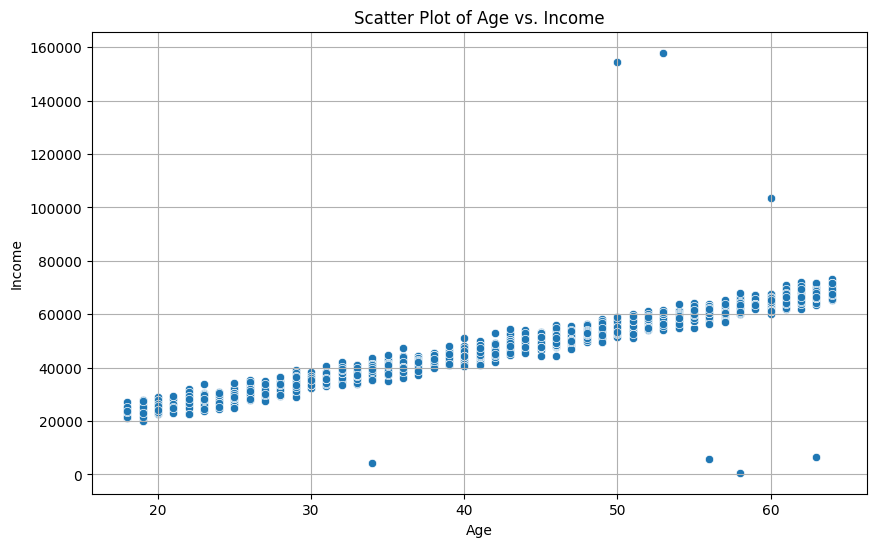

In [3]:
# Cell 3: 1. Scatter Plots – Bivariate Analysis (Age vs. Income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

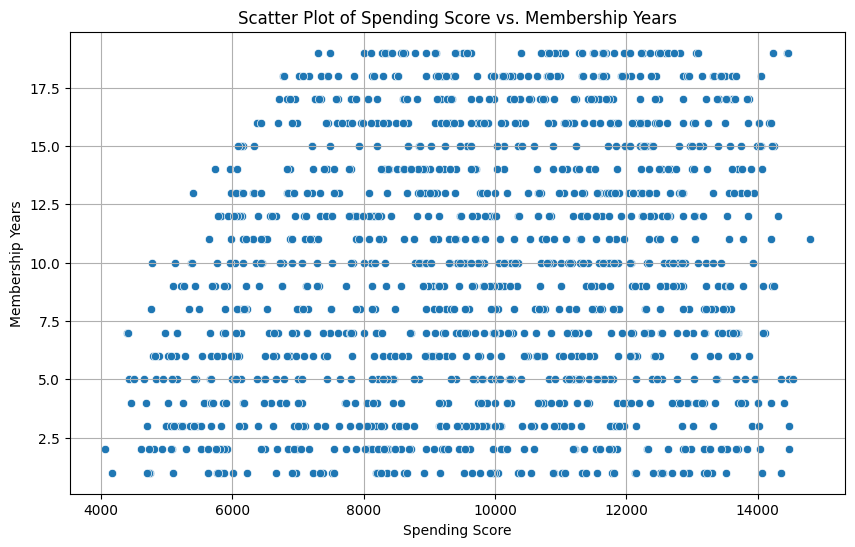

In [4]:
# Cell 4: 1. Scatter Plots – Bivariate Analysis (Spending_Score vs. Membership_Years)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending_Score', y='Membership_Years', data=df)
plt.title('Scatter Plot of Spending Score vs. Membership Years')
plt.xlabel('Spending Score')
plt.ylabel('Membership Years')
plt.grid(True)
plt.show()

Independent Samples T-test (Income by Age Group):
T-statistic: -49.91
P-value: 0.000


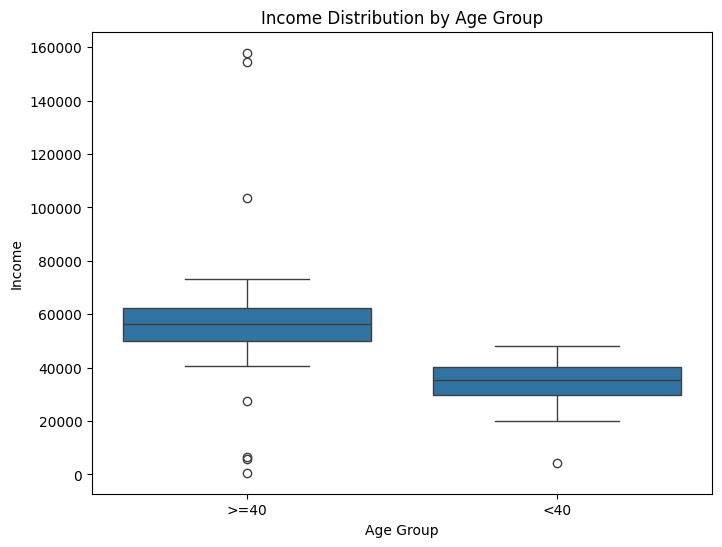

In [5]:
# Cell 5: 2. Inferential Statistics - Independent Samples T-test (comparing Income of two arbitrary age groups)
# Create two arbitrary age groups
group1 = df[df['Age'] < 40]['Income']
group2 = df[df['Age'] >= 40]['Income']

# Perform independent samples t-test
if len(group1) > 0 and len(group2) > 0:
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False) # Assuming unequal variances
    print("Independent Samples T-test (Income by Age Group):")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.3f}")
else:
    print("Not enough data in one or both age groups to perform the t-test.")

# Visualization: Box plots to compare the distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x=np.where(df['Age'] < 40, '<40', '>=40'), y='Income', data=df)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.show()

In [6]:
# Cell 6: 3. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
            Number          Age         Income  Spending_Score  \
count  1359.000000  1356.000000    1362.000000     1360.000000   
mean    681.229581    43.235251   48334.035194     9767.529541   
std     393.565092    12.535233   13570.566176     2532.259936   
min       1.000000    18.000000     663.583370     4064.177336   
25%     340.500000    33.000000   38444.944045     7831.028573   
50%     682.000000    43.000000   48655.036840     9856.239066   
75%    1021.500000    54.000000   58579.901010    11811.599117   
max    1362.000000    64.000000  157951.445440    14791.611800   

       Membership_Years  Purchase_Frequency  Last_Purchase_Amount  
count       1356.000000         1361.000000           1359.000000  
mean           9.525074           49.582465           4932.572727  
std            5.415173           27.060303           1266.655919  
min            1.000000            4.876052           2057.551913  
25%            5.000000           26.576

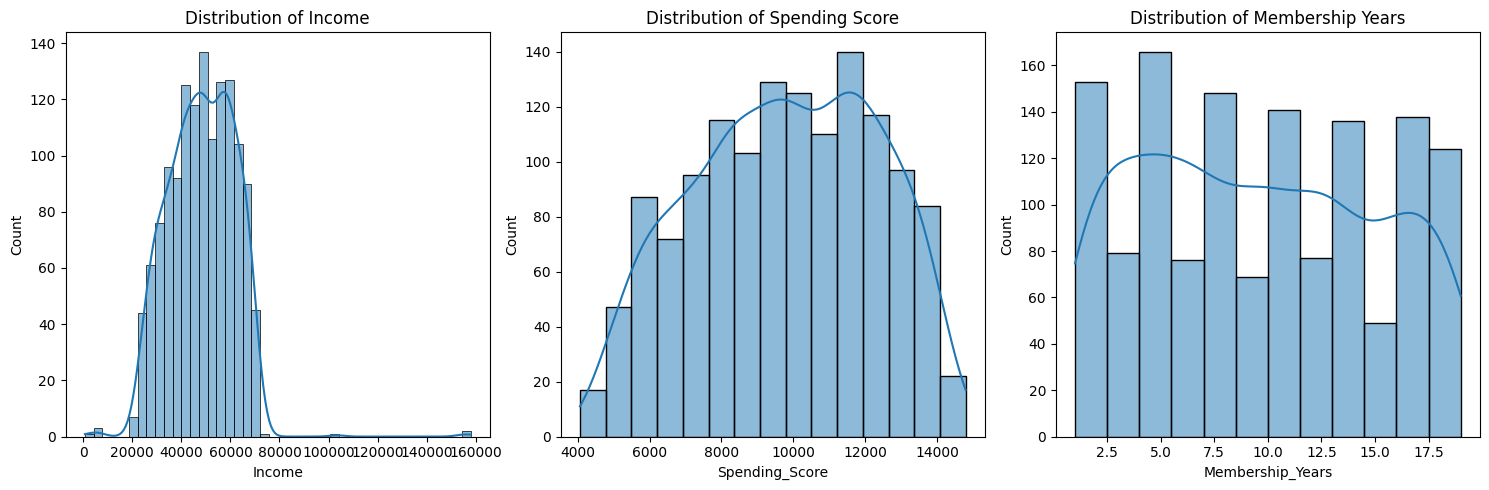

In [7]:
# Cell 7: 4. Dashboard Evaluation (Illustrative - showing distributions of key variables)
# In a real dashboard evaluation, you'd be assessing an existing dashboard.
# Here, we'll create basic distribution plots as if they were part of a dashboard.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')

plt.subplot(1, 3, 2)
sns.histplot(df['Spending_Score'], kde=True)
plt.title('Distribution of Spending Score')

plt.subplot(1, 3, 3)
sns.histplot(df['Membership_Years'], kde=True)
plt.title('Distribution of Membership Years')

plt.tight_layout()
plt.show()

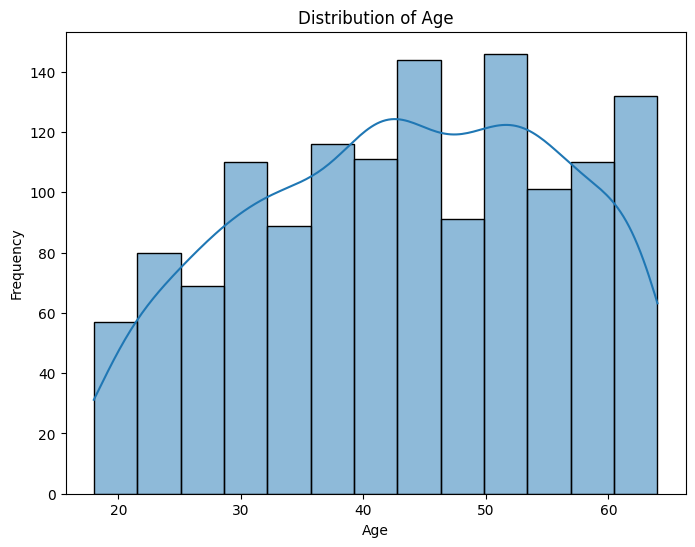

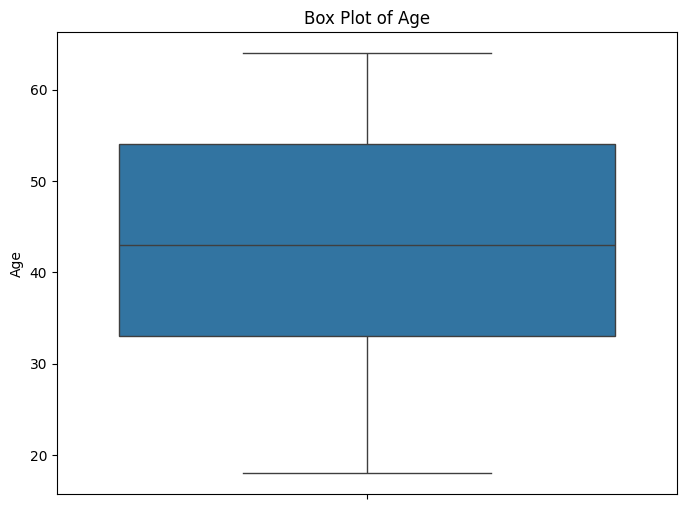

In [8]:
# Cell 8: 5. Univariate Analysis (Distribution of Age)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Additional univariate analysis: Box plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

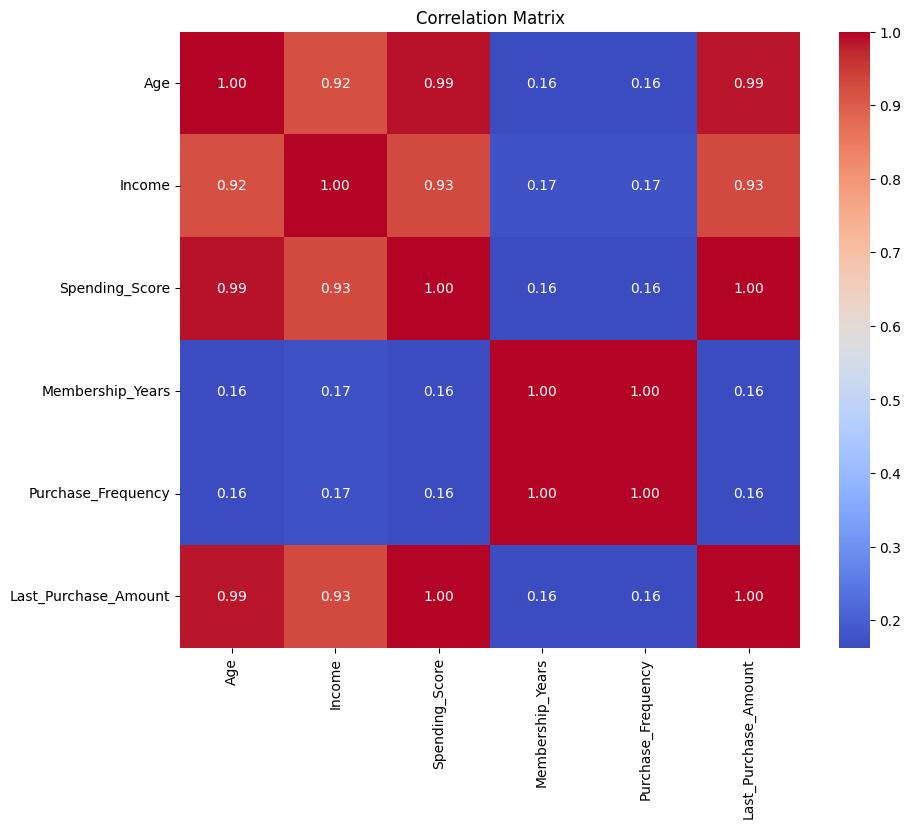

In [9]:
# Cell 9: 6. Correlation Analysis
correlation_matrix = df[['Age', 'Income', 'Spending_Score', 'Membership_Years', 'Purchase_Frequency', 'Last_Purchase_Amount']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

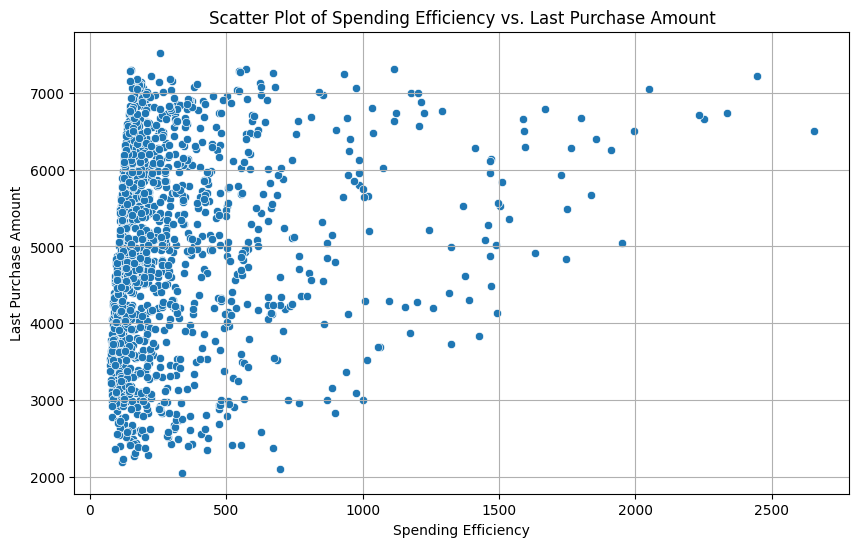


DataFrame with new 'Spending_Efficiency' feature:
   Number   Age       Income  Spending_Score  Membership_Years  \
0     1.0  56.0  61350.84215    12372.864450              15.0   
1     2.0  46.0  53777.18224    11001.604230              10.0   
2     3.0  32.0  39460.32263     8007.385018              19.0   
3     4.0  60.0  66672.12210    13526.548370              12.0   
4     5.0  38.0  44459.08553     9059.304083               9.0   

   Purchase_Frequency  Last_Purchase_Amount  Spending_Efficiency  
0           77.685590           6232.122440           159.268461  
1           51.858351           5545.849698           212.147199  
2           98.166371           4054.645293            81.569532  
3           62.530976           6815.544393           216.317561  
4           46.470533           4617.833484           194.947277  


In [10]:
# Cell 10: 7. Feature Engineering (Example: Creating a new feature - Spending Efficiency)
# Assuming Spending Efficiency can be represented by Spending Score per Purchase Frequency
df['Spending_Efficiency'] = df['Spending_Score'] / (df['Purchase_Frequency'] + 1e-6) # Adding a small epsilon to avoid division by zero

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending_Efficiency', y='Last_Purchase_Amount', data=df)
plt.title('Scatter Plot of Spending Efficiency vs. Last Purchase Amount')
plt.xlabel('Spending Efficiency')
plt.ylabel('Last Purchase Amount')
plt.grid(True)
plt.show()

print("\nDataFrame with new 'Spending_Efficiency' feature:")
print(df.head())


Missing Values:
Number                  3
Age                     6
Income                  0
Spending_Score          2
Membership_Years        6
Purchase_Frequency      1
Last_Purchase_Amount    3
Spending_Efficiency     3
dtype: int64


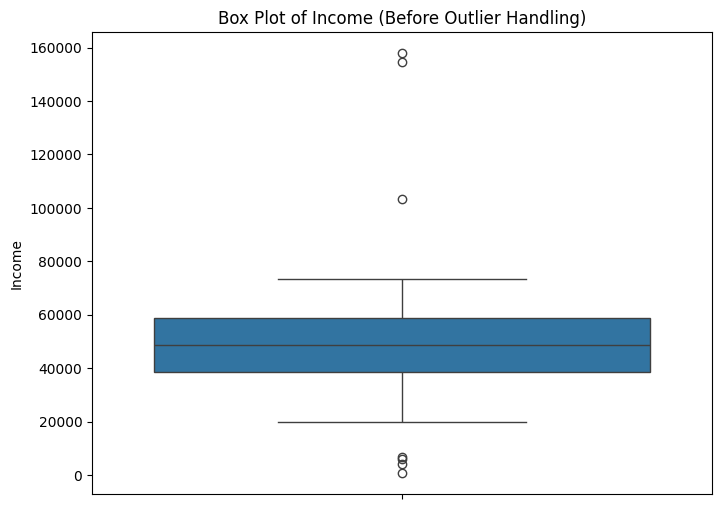

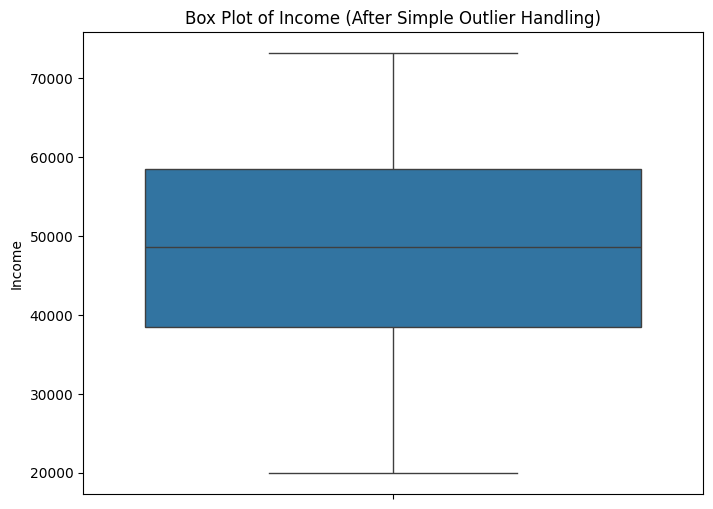


Shape of DataFrame before cleaning: (1362, 8)
Shape of DataFrame after simple outlier cleaning: (1355, 8)


In [11]:
# Cell 11: 8. Data Cleaning (Handling missing values and outliers - illustrative)
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# For demonstration, let's assume there are outliers in 'Income'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Income', data=df)
plt.title('Box Plot of Income (Before Outlier Handling)')
plt.ylabel('Income')
plt.show()

# Example of a simple outlier removal (you might need more sophisticated methods)
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
df_cleaned = df[(df['Income'] >= lower_bound_income) & (df['Income'] <= upper_bound_income)].copy()

plt.figure(figsize=(8, 6))
sns.boxplot(y='Income', data=df_cleaned)
plt.title('Box Plot of Income (After Simple Outlier Handling)')
plt.ylabel('Income')
plt.show()

print("\nShape of DataFrame before cleaning:", df.shape)
print("Shape of DataFrame after simple outlier cleaning:", df_cleaned.shape)